# CIFAR-10読み込み
- MNISTは簡単すぎてバッチ正規化の効果がよくわからないので、もう少し難しい問題を解く。

http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [1]:
from keras.datasets import cifar10
import os
import numpy as np

if os.path.exists('cifar10.npz'):
    f = np.load('cifar10.npz')
    x_train = f['x_train']
    x_test = f['x_test']
    y_train = f['y_train']
    y_test = f['y_test']
else:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    np.savez_compressed('cifar10', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

Using TensorFlow backend.


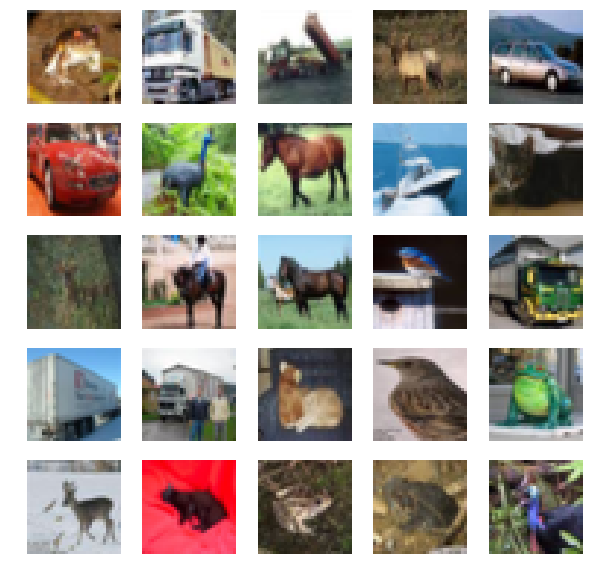

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i,x in enumerate(x_train[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(x)
    plt.axis('off')

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
import numpy as np

#x_train = np.reshape(x_train, (50000, 3072)) / 255.
#x_test = np.reshape(x_test, (10000, 3072)) / 255.
y_train = np.eye(10)[y_train].squeeze()
y_trest = np.eye(10)[y_test].squeeze()

# バッチ正規化
- バッチ正規化のレイヤー名は`BatchNormalization`。
- `BatchNormalization`クラスをインスタンス化するときは引数は必要ない。
- 自分でバッチ正規化のパラメータを調整したい場合は、Kerasのサイトで`BatchNormalization`が取る引数を調べる。  
https://keras.io/ja/layers/normalization/
- 色々流儀はあるが、`Dense`（線形変換のこと）→`BatchNormalization`→`Activation`（活性化関数のこと）の順がおすすめ。
- 中間層１層（500ノード）のMLPでテストする。

In [6]:
from keras.layers import Input, Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.models import Model

#x_bn = Input((3072,))
x_bn = Input((32,32,3))

h_bn = Conv2D(64, (3,3), padding='same')(x_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Conv2D(64, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = MaxPooling2D((2,2))(h_bn)

h_bn = Conv2D(128, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Conv2D(128, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = MaxPooling2D((2,2))(h_bn)

h_bn = Conv2D(256, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Conv2D(256, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Conv2D(256, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Conv2D(256, (3,3), padding='same')(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = MaxPooling2D((2,2))(h_bn)

h_bn = Flatten()(h_bn)

h_bn = Dense(1024)(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Dense(1024)(h_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Dense(10)(h_bn)
h_bn = BatchNormalization()(h_bn)
y_bn = Activation('softmax')(h_bn)

mlp_bn = Model(x_bn, y_bn)

mlp_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [7]:
mlp_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
__________

In [8]:
hist_bn = mlp_bn.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 1877s - loss: 1.2780 - acc: 0.5654 - val_loss: 1.1297 - val_acc: 0.6178
Epoch 2/30
45000/45000 [==============================] - 1893s - loss: 0.8678 - acc: 0.7120 - val_loss: 0.8640 - val_acc: 0.7068
Epoch 3/30
45000/45000 [==============================] - 1873s - loss: 0.7019 - acc: 0.7709 - val_loss: 0.9028 - val_acc: 0.7040
Epoch 4/30
45000/45000 [==============================] - 1871s - loss: 0.5817 - acc: 0.8085 - val_loss: 0.6420 - val_acc: 0.7886
Epoch 5/30
45000/45000 [==============================] - 1868s - loss: 0.4857 - acc: 0.8420 - val_loss: 0.6096 - val_acc: 0.7998
Epoch 6/30
45000/45000 [==============================] - 1868s - loss: 0.3987 - acc: 0.8704 - val_loss: 0.5993 - val_acc: 0.8062
Epoch 7/30
45000/45000 [==============================] - 1866s - loss: 0.3148 - acc: 0.8995 - val_loss: 0.6367 - val_acc: 0.8024
Epoch 8/30
45000/45000 [=================

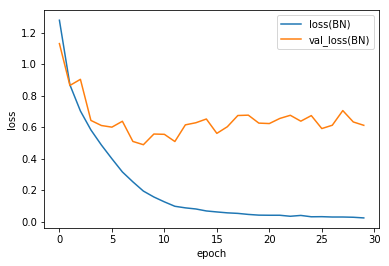

In [9]:
plt.plot(hist_bn.epoch, hist_bn.history['loss'], label='loss(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_loss'], label='val_loss(BN)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

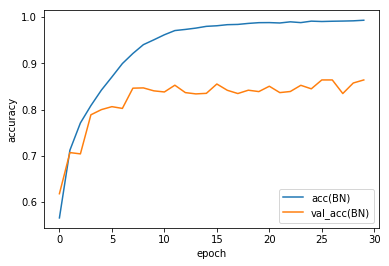

In [10]:
plt.plot(hist_bn.epoch, hist_bn.history['acc'], label='acc(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_acc'], label='val_acc(BN)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# バッチ正規化なし
- 比較のためにバッチ正規化を入れないモデルも訓練する。

In [18]:
#x = Input((3072,))
x = Input((32,32,3))

h = Conv2D(64, (3,3), padding='same')(x)
h = Activation('relu')(h)

h = Conv2D(64, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = MaxPooling2D((2,2))(h)

h = Conv2D(128, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = Conv2D(128, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = MaxPooling2D((2,2))(h)

h = Conv2D(256, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = Conv2D(256, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = Conv2D(256, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = Conv2D(256, (3,3), padding='same')(h)
h = Activation('relu')(h)

h = MaxPooling2D((2,2))(h)

h = Flatten()(h)

h = Dense(1024)(h)
h = Activation('relu')(h)

h = Dense(1024)(h)
h = Activation('relu')(h)

h = Dense(10)(h)
y = Activation('softmax')(h)


mlp = Model(x, y)

mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [20]:
hist = mlp.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 1463s - loss: 14.4953 - acc: 0.1002 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 2/30
45000/45000 [==============================] - 1745s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 3/30
45000/45000 [==============================] - 1466s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 4/30
45000/45000 [==============================] - 1453s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 5/30
45000/45000 [==============================] - 1453s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 6/30
45000/45000 [==============================] - 1453s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 7/30
45000/45000 [==============================] - 1451s - loss: 14.5020 - acc: 0.1003 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 8/30
45000/45000 [===

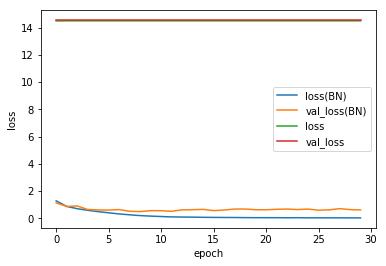

In [21]:
# バッチ正規化あり
plt.plot(hist_bn.epoch, hist_bn.history['loss'], label='loss(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_loss'], label='val_loss(BN)')

# バッチ正規化なし
plt.plot(hist.epoch, hist.history['loss'], label='loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

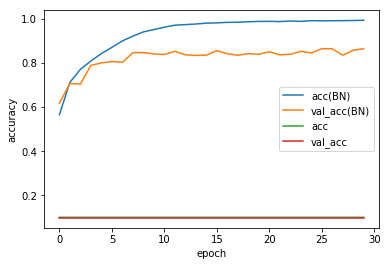

In [22]:
# バッチ正規化あり
plt.plot(hist_bn.epoch, hist_bn.history['acc'], label='acc(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_acc'], label='val_acc(BN)')

# バッチ正規化なし
plt.plot(hist.epoch, hist.history['acc'], label='acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')